<p><font size="6" color='grey'> <b>

Generative KI. Verstehen. Anwenden. Gestalten.
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
LangChain 101
</b></font> </br></p>

---

In [5]:
#@title 🔧 Umgebung einrichten{ display-mode: "form" }
!uv pip install --system -q git+https://github.com/ralf-42/GenAI.git#subdirectory=04_modul
from genai_lib.utilities import check_environment, get_ipinfo, setup_api_keys, mprint, install_packages, load_chat_prompt_template, mermaid
setup_api_keys(['OPENAI_API_KEY'], create_globals=False)
print()
check_environment()
print()
get_ipinfo()

✓ OPENAI_API_KEY erfolgreich gesetzt

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Installierte LangChain- und LangGraph-Bibliotheken:
langchain                                1.1.0
langchain-chroma                         1.0.0
langchain-classic                        1.0.0
langchain-community                      0.4.1
langchain-core                           1.1.0
langchain-ollama                         1.0.0
langchain-openai                         1.1.0
langchain-text-splitters                 1.0.0
langgraph                                1.0.3
langgraph-checkpoint                     3.0.1
langgraph-prebuilt                       1.0.5
langgraph-sdk                            0.2.10

IP-Adresse: 35.224.134.208
Hostname: 208.134.224.35.bc.googleusercontent.com
Stadt: Council Bluffs
Region: Iowa
Land: US
Koordinaten: 41.2619,-95.8608
Provider: AS396982 Google LLC
Postleitzahl: 51502
Zeitzone: America/Chicago


# 1 | Was ist LangChain?
---

LangChain ist ein Framework zur **Entwicklung von Anwendungen mit großen Sprachmodellen** (LLMs). Es vereinfacht die Integration von LLMs in eigene Anwendungen durch:

- Modulare Komponenten für verschiedene Aufgaben
- Vorgefertigte Ketten (Chains) für komplexe Workflows
- Einfache Integration externer Datenquellen
- Werkzeuge für das Speichern von Konversationskontexten



[Einführung](https://python.langchain.com/docs/introduction/)   
[Konzepte](https://python.langchain.com/docs/concepts/)   
[API-References](https://python.langchain.com/api_reference/index.html)   
[Integrations](https://python.langchain.com/docs/integrations/providers/)

---

[Tutorials](https://python.langchain.com/docs/tutorials/)   
[How-to-Guides](https://python.langchain.com/docs/how_to/)   

# 2 | Überblick Konzepte
---




Die Darstellung veranschaulicht das Grundprinzip von LangChain: die Verkettung verschiedener Konzepte zu einem durchgängigen Verarbeitungsprozess, der Eingaben in strukturierte Ausgaben umwandelt.

![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_01.png)

Konzepte von LangChain sind grundlegende Bausteine und Prinzipien. Hier sind einige der wichtigsten Konzepte:

+ Nachrichten (**Messages**): Kommunikationseinheiten in Chat-Modellen für Ein- und Ausgabe.
+ Prompt-Vorlagen (**Prompt template**s): Komponenten zur Erstellung strukturierter Prompts für LLMs.
+ Chat-Modelle (**Chat models**): LLMs, die über eine Chat-API verfügbar sind und Sequenzen von Nachrichten verarbeiten.
+ Chains (**Chains**): Verknüpfungen mehrerer LLMs oder anderer Komponenten für komplexere Anwendungen.
+ Strukturierte Ausgabe (**Structured output**): Technik, um Chat-Modelle in strukturierten Formaten antworten zu lassen.
+ Chat-Verlauf (**Chat history**): Eine Sequenz von Nachrichten, die eine Konversation darstellt.
+ Retrieval Augmented Generation (**RAG**): Technik zur Verbesserung von Sprachmodellen durch Kombination mit externen Wissensbasen.
+ Retriever (**Retriever**): Komponenten, die relevante Dokumente aus einer Wissensbasis abrufen.
+ Agenten (**Agents**): Nutzen Sprachmodelle, um Aktionssequenzen auszuwählen und mit externen Ressourcen zu interagieren.
+ Tools (**Tools**): Funktionen mit definierten Schemata für Name, Beschreibung und Argumente.


# 3 | Nachrichten-Typen
---

Beim Einsatz von Large Language Models (LLMs) wie GPT gibt es drei Hauptarten von Nachrichten (Messages), die die Interaktion mit dem Modell steuern. Diese Messages definieren, wie das Modell reagiert, welche Eingaben es erhält und welche Ausgaben es generiert.



**System Message:**   
Die `System Message` dient dazu, das **Verhalten des LLMs** zu steuern. Sie ist eine nicht sichtbare Nachricht, die dem Modell Anweisungen gibt, wie es sich verhalten soll. Dabei kann sie die Persönlichkeit, den Tonfall und die Einschränkungen des Modells beeinflussen. Die Systemnachricht funktioniert wie eine Art "Rollenspiel-Anweisung", um das Modell in eine gewünschte Rolle zu versetzen.

*Merkmale:*
- Definiert, wie das Modell reagieren soll
- Legt Persönlichkeit, Verhalten und Einschränkungen fest
- Wird zu Beginn einer Sitzung gesetzt und bleibt bestehen
- Nicht sichtbar für den Benutzer

*Beispiel einer System Message:*
```json
{
  "role": "system",
  "content": "Du bist ein KI-Assistent, der präzise und informative Antworten in einem professionellen Ton liefert."
}
```
Dieses Beispiel weist das Modell an, in einem professionellen Tonfall kurze und informative Antworten zu geben.

---



**User Message**   
Die `User Message` ist die eigentliche **Eingabe des Benutzer**s. Sie kann eine Frage, eine Aufforderung, kontextrelevanten Inhalt oder ein Befehl sein. Das Modell nutzt diese Nachricht als Ausgangspunkt für die Generierung einer Antwort.

*Merkmale:*
- Direkte Eingabe des Benutzers
- Kann eine Frage, Aufforderung, kontextrelevanten Inhalt oder einen Befehl enthalten
- Basis für die Antwort des Modells

*Beispiel einer User Message:*
```json
{
  "role": "user",
  "content": "Was sind die wichtigsten Unterschiede zwischen KI und maschinellem Lernen?"
}
```
Hier fragt der Benutzer nach den Unterschieden zwischen KI und maschinellem Lernen.

---


**AI Message**   
Die `AI Message` ist die **Antwort, die das Modell generiert**. Sie basiert auf der User Message und den Anweisungen aus der System Message. Die AI Message kann verschiedene Eigenschaften haben, ist aber hauptsächlich auf den Inhalt fokussiert.

*Merkmale:*
- Antwort des Modells auf die Benutzeranfrage
- Kann verschiedene Eigenschaften haben (z. B. Länge, Stil)
- Hauptsächlich inhaltlich relevant

*Beispiel einer AI Message:*
```json
{
  "role": "assistant",
  "content": "Künstliche Intelligenz (KI) ist ein weites Feld, das verschiedene Teilgebiete umfasst, darunter auch das maschinelle Lernen (ML). ML konzentriert sich auf die Erstellung von Modellen, die aus Daten lernen und Vorhersagen treffen."
}
```
Hier gibt das Modell eine inhaltliche Antwort auf die Frage des Benutzers.




**System-Message vs. User-Message**



*System-Message*

**Funktion:** Persistente Verhaltensregeln über verschiedene Aufgaben hinweg

**Enthält:**
- Identität & Rolle des Modells
- Grundsätzliche Methodik & Denkansatz
- Durchgängige Qualitätsstandards
- Tool-/Methodenkompetenz
- Generische Few-Shot-Examples

**Metapher:** Das Betriebssystem – selten verändert, verhaltensbestimmend





*User-Message*

**Funktion:** Konkrete Aufgabe und spezifischer Kontext für diese Interaktion

**Enthält:**
- Situativer Kontext & Hintergrund
- Klare Aufgabenstellung
- Erwartete Format/Umfang/Detailgrad
- Spezifische Daten & Randbedingungen
- Aufgabenspezifische Verhaltensanpassungen

**Metapher:** Die Arbeitsanweisung – variiert bei jeder Anfrage



**Kurz gefasst**   

+  **System Message** legt die Regeln und das Verhalten des Modells fest.
+ **User Message** stellt eine Anfrage oder einen Befehl.
+ **AI Message** gibt die generierte Antwort basierend auf den vorherigen Nachrichten.




# 4 | Ein einfaches Modell
---


In [6]:
# Importe
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.prompts.few_shot import FewShotPromptTemplate
from langchain_core.output_parsers.string import StrOutputParser

In [7]:
# Parameter
model_provider="openai"
model_name = "gpt-4o-mini"
temperature = 0.0

In [8]:
# Modell definieren
llm = init_chat_model(model_name, model_provider=model_provider, temperature=temperature)

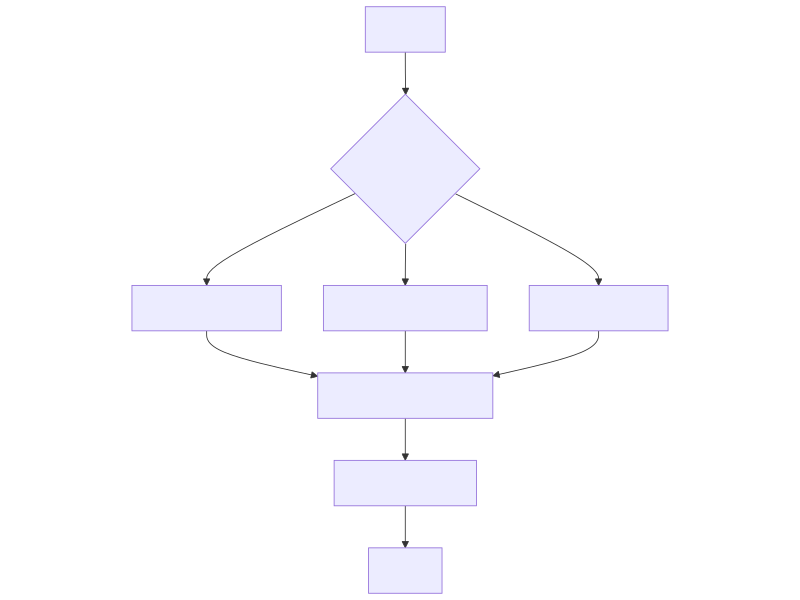

In [9]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Mermaid</font> </br></p>

diagram = """
graph TD
    A[Start]
    A --> B{Model Parameter}
    B --> C[Provider OpenAI]
    B --> D[Model gpt-4o-mini]
    B --> E[Temperature 0]
    C --> F[Initialize Chat Model]
    D --> F
    E --> F
    F --> G[LLM configured]
    G --> H[End]
"""
mermaid(diagram, width=800, height=600)

# 5 | Prompts
---

![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_02.png)



Prompts sind die Eingaben bzw. Aufträge an das LLM. LangChain bietet verschiedene Template-Systeme. Ein **Template** ist eine **Vorlage** – genauer gesagt ein Text mit **Platzhaltern**, die später durch echte Werte ersetzt werden.


Ein **PromptTemplate** ist eine Vorlage für einen Eingabetext, der an ein Sprachmodell geschickt wird.
Er enthält Platzhalter `{placeholder}`, die später mit Nutzereingaben oder Kontext befüllt werden.

**Templates machen die KI-Prompts:**

+ Wiederverwendbar (z. B. für viele Themen oder Fragen)

+ Strukturiert (z. B. mit Rollen und Anweisungen)

+ Dynamisch erweiterbar (mit Memory, Tools, etc.)

## 5.1 | Simple Prompt


<p><font color='darkblue' size="4">
<b>❗Hinweis:</b>
</font></p>
Ohne Memory-Management hat das Modell ein kurzes Gedächnis.


**Prompt wird als Zeichenkette übergeben:**

In [10]:
# Aufruf
response = llm.invoke("Was ist Generative KI?")

In [11]:
# Antwort
type(response)

langchain_core.messages.ai.AIMessage

In [12]:
response

AIMessage(content='Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt oft Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.\n\nEin bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.\n\nGenerative KI hat viele Anwendungen, darunter:\n\n1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.\n2. **Datenaugmentation**: Generierung zusätzlicher T

In [13]:
for r in response:
    print(r)

('content', 'Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt oft Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.\n\nEin bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.\n\nGenerative KI hat viele Anwendungen, darunter:\n\n1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.\n2. **Datenaugmentation**: Generierung zusätzlicher Trainin

In [14]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt oft Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.

Ein bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.

Generative KI hat viele Anwendungen, darunter:

1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.
2. **Datenaugmentation**: Generierung zusätzlicher Trainingsdaten für maschinelles Lernen.
3. **Simulationen**: Erzeugung realistischer Szenarien für Training und Forschung.
4. **Personalisierung**: Anpassung von Inhalten an individuelle Nutzerpräferenzen.

Die Technologie wirft jedoch auch ethische und gesellschaftliche Fragen auf, insbesondere in Bezug auf Urheberrecht, Fälschungen und die potenzielle Verbreitung von Fehlinformationen.

In [15]:
# Aufruf
response = llm.invoke("Was war meine letzte Frage?")

In [16]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Es tut mir leid, aber ich kann keine vorherigen Interaktionen oder Fragen speichern oder abrufen. Wie kann ich Ihnen heute helfen?

**Prompt wird als formatierte String-Variable übergeben:**

In [17]:
# f-String für simple prompt mit template
thema = "Machine Learning"
prompt = f"Erkläre {thema} in einfachen Worten."

In [18]:
# Aufruf
response = llm.invoke(prompt)

In [19]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Machine Learning, oder maschinelles Lernen, ist ein Teilbereich der Künstlichen Intelligenz, der es Computern ermöglicht, aus Daten zu lernen und Muster zu erkennen, ohne dass sie dafür explizit programmiert werden müssen. 

Stell dir vor, du hast viele Bilder von Katzen und Hunden. Anstatt einem Computer genau zu sagen, wie eine Katze oder ein Hund aussieht, zeigst du ihm einfach viele Beispiele. Der Computer analysiert diese Bilder und lernt, die Unterschiede zwischen Katzen und Hunden zu erkennen. 

Wenn du ihm dann ein neues Bild zeigst, kann er basierend auf dem, was er gelernt hat, vorhersagen, ob es sich um eine Katze oder einen Hund handelt. 

Zusammengefasst: Machine Learning ist wie das Lernen eines Menschen – je mehr Informationen und Erfahrungen er hat, desto besser kann er Entscheidungen treffen oder Vorhersagen machen.

**Prompt wird als template übergeben:**

In [20]:
# Einfaches Template mit Platzhaltern
simple_prompt_template = PromptTemplate.from_template(
    "Erkläre {thema} in einfachen Worten."
)

In [21]:
# Prompt-Erstellung
thema = "Generative KI"
prompt = simple_prompt_template.format(thema=thema)
prompt

'Erkläre Generative KI in einfachen Worten.'

In [22]:
# Aufruf
response = llm.invoke(prompt)

In [23]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Generative KI ist eine Art von künstlicher Intelligenz, die in der Lage ist, neue Inhalte zu erstellen. Das können Texte, Bilder, Musik oder sogar Videos sein. Sie funktioniert, indem sie aus großen Mengen von Daten lernt, wie bestimmte Inhalte aussehen oder klingen. 

Stell dir vor, du hast viele Bilder von Katzen und Hunden. Eine generative KI kann dann lernen, wie diese Tiere aussehen, und schließlich ein ganz neues Bild von einem Tier erstellen, das es noch nie zuvor gesehen hat. 

Im Grunde genommen ist generative KI wie ein kreativer Computer, der neue Ideen und Inhalte basierend auf dem, was er gelernt hat, entwickeln kann.

## 5.2 | ChatPromptTemplate 📌

Das **ChatPromptTemplate** ist eine spezielle Prompt-Vorlage für Chatmodelle (z. B. GPT-3.5, GPT-4), die **mehrere Rollen und Nachrichten** unterstützt – also genau das, was Chat-Modelle eigentlich brauchen.

Es gehört zur LangChain-Bibliothek und baut auf dem Prinzip auf:


**Wer sagt was? → system, user, assistant, etc.**

In LangChain unterstützte Rollen:

+ "system" - für Systemnachrichten
+ "assistant" oder "ai" - für Assistenten-/KI-Antworten
+ "user" oder "human" - für Benutzernachrichten

<p><font color='black' size="5">
Variante 1: Liste & Tupel 📌
</font></p>

In [24]:
# Template als Liste & Tupel
chat_template = ChatPromptTemplate.from_messages([
    ("system", "{system_prompt}"),
    ("human", "Erkläre mir {thema}"),
])

In [25]:
# Variablen zuweisen
system_prompt = "Du bist ein hilfreicher und humorvoller Assistent."
thema = "Machine Learning"

In [26]:
# Template & Variablen kombinieren
prompt = chat_template.format_messages(system_prompt=system_prompt, thema=thema)

In [27]:
# Sprachmodell aufrufe
response = llm.invoke(prompt)

In [28]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Klar, ich erkläre dir Machine Learning! Stell dir vor, du hast einen Hund, der nicht weiß, wie man „Sitz“ macht. Du zeigst ihm immer wieder, was er tun soll, und wenn er es richtig macht, gibst du ihm ein Leckerli. Nach einer Weile lernt der Hund, dass „Sitz“ bedeutet, seinen Hintern auf den Boden zu setzen, um das Leckerli zu bekommen. 

So ähnlich funktioniert Machine Learning! Es ist ein Teilbereich der Künstlichen Intelligenz, bei dem Computer aus Daten lernen, ohne dass sie explizit programmiert werden. Hier sind die Grundprinzipien:

1. **Daten**: Du brauchst eine Menge von Beispielen (Daten), um dem Computer zu zeigen, was er lernen soll. Das können Bilder, Texte oder Zahlen sein.

2. **Modelle**: Das ist wie das Gehirn des Computers. Es verarbeitet die Daten und versucht, Muster zu erkennen. Es gibt verschiedene Arten von Modellen, je nachdem, was du erreichen möchtest.

3. **Training**: Hier kommt der spannende Teil! Du fütterst das Modell mit deinen Daten und lässt es lernen. Es passt seine internen Parameter an, um die besten Vorhersagen zu treffen.

4. **Testen**: Nachdem das Modell trainiert wurde, testest du es mit neuen Daten, um zu sehen, wie gut es gelernt hat. Wenn es gut abschneidet, kannst du es verwenden!

5. **Verbesserung**: Wenn das Modell nicht gut abschneidet, kannst du es weiter trainieren, mehr Daten hinzufügen oder das Modell selbst anpassen.

Das Ziel von Machine Learning ist es, Vorhersagen zu treffen oder Entscheidungen zu treffen, basierend auf den gelernten Mustern. Und das Beste daran? Es kann in vielen Bereichen eingesetzt werden, von der Spracherkennung über Bildverarbeitung bis hin zu Empfehlungen für deine nächste Lieblingsserie!

Also, wenn du das nächste Mal einen Hund siehst, der „Sitz“ macht, denk daran: Er hat gerade ein bisschen „Machine Learning“ betrieben! 🐶✨

**... oder ...**

<p><font color='black' size="5">
Variante 2: Liste & Dictionary
</font></p>

In [29]:
# Template als Liste & Dictionary
chat_template = ChatPromptTemplate.from_messages([
    {"role": "system", "content": "Du bist ein hilfreicher und humorvoller Assistent."},
    {"role": "human", "content": "Erkläre mir {thema}"},
])

In [30]:
# Variablen zuweisen
system_prompt = "Du bist ein hilfreicher und humorvoller Assistent."
thema = "Machine Learning"

In [31]:
# Template & Variablen kombinieren
prompt = chat_template.format_messages(system_prompt=system_prompt, thema=thema)

In [32]:
# Sprachmodell aufrufe
response = llm.invoke(prompt)

In [33]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Klar, ich erkläre dir gerne Machine Learning! 

Machine Learning (ML) ist ein Teilbereich der Künstlichen Intelligenz (KI), der es Computern ermöglicht, aus Daten zu lernen und Muster zu erkennen, ohne dass sie explizit programmiert werden müssen. Man könnte sagen, es ist wie das Lernen eines neuen Hobbys – je mehr du übst, desto besser wirst du darin!

Hier sind die grundlegenden Konzepte:

1. **Daten**: Machine Learning benötigt Daten, um zu lernen. Das können Bilder, Texte, Zahlen oder sogar Töne sein. Je mehr qualitativ hochwertige Daten du hast, desto besser kann das Modell lernen.

2. **Modelle**: Ein Modell ist eine mathematische Struktur, die die Beziehung zwischen den Eingabedaten und den Ausgaben beschreibt. Man kann sich das wie ein Rezept vorstellen, das dir sagt, wie du aus den Zutaten (Daten) ein Gericht (Vorhersage) zubereitest.

3. **Training**: Während des Trainingsprozesses wird das Modell mit Daten gefüttert. Es versucht, Muster zu erkennen und seine Vorhersagen zu verbessern. Das ist wie beim Üben eines Instruments – am Anfang klingt es vielleicht schief, aber mit der Zeit wird es besser!

4. **Überwachung**: Es gibt verschiedene Arten von Machine Learning, darunter:
   - **Überwachtes Lernen**: Hier hat man ein „Lehrer“, der dem Modell sagt, was richtig und was falsch ist. Zum Beispiel, wenn du ein Modell trainierst, um Katzen von Hunden zu unterscheiden, zeigst du ihm viele Bilder von beiden und sagst ihm, welches Bild was ist.
   - **Unüberwachtes Lernen**: Hier gibt es keinen Lehrer. Das Modell versucht, selbst Muster in den Daten zu finden. Es ist wie ein Kind, das im Spielzeugzimmer nach neuen Spielzeugen sucht, ohne zu wissen, was es finden wird.
   - **Bestärkendes Lernen**: Hier lernt das Modell durch Belohnungen und Bestrafungen, ähnlich wie ein Hund, der für das Sitzen ein Leckerli bekommt.

5. **Anwendungen**: Machine Learning wird in vielen Bereichen eingesetzt, von der Spracherkennung über Bildverarbeitung bis hin zu Empfehlungen in Online-Shops. Wenn dir Netflix vorschlägt, was du als Nächstes schauen solltest, ist das ein Beispiel für Machine Learning in Aktion!

Zusammengefasst: Machine Learning ist wie ein intelligenter Koch, der aus vielen Rezepten lernt, um das perfekte Gericht zuzubereiten – und das alles, ohne dass du ihm jedes Mal sagen musst, was er tun soll! Wenn du noch mehr Fragen hast oder tiefer in ein bestimmtes Thema eintauchen möchtest, lass es mich wissen!


<p><font color='black' size="5">
Vergleich: f-string vs. PromptTemplate vs. ChatPromptTemplate
</font></p>



| Vorteil                      | `f-string` (Python)           | `PromptTemplate`              | `ChatPromptTemplate`            |
| ---------------------------- | ----------------------------- | ----------------------------- | ------------------------------- |
| 🚻 Rollenstruktur            | ❌ Keine Unterstützung         | ❌ Nur einfacher Text          | ✅ Klar: `system`, `user`, `ai`  |
| 📚 Konversationsaufbau       | ❌ Nicht geeignet              | ❌ Nicht geeignet              | ✅ Ideal für Multi-Turn-Dialoge <br>    (mehreren Gesprächsrunden)  |
| 🔄 Kombinierbar mit `Memory` | ❌ Nein                        | ❌ Nein                        | ✅ Ja, via `MessagesPlaceholder` |
| 🔌 Für Chatmodelle wie GPT   | ⚠️ Manuell als String         | ⚠️ Nur als Fließtext          | ✅ Nativ & strukturiert          |
| 🔍 Klarheit & Wartbarkeit    | ⚠️ Inline, schwer erweiterbar | ⚠️ Nur Inline-Text            | ✅ Saubere Message-Trennung      |
| 🧪 Prompt-Testbarkeit        | ❌ Keine Validierung           | ⚠️ Eingeschränkt               | ✅ Besser strukturiert           |
| ⚡ Performance                | ✅ Schnell & direkt            | ✅ Schnell                     | ✅ Schnell                       |
| 🔧 Validierung von Variablen | ❌ Keine                       | ✅ Automatisch                 | ✅ Automatisch                   |
| 🧩 Wiederverwendbarkeit      | ❌ Eingeschränkt               | ✅ Als Template-Objekt         | ✅ Als Template-Objekt           |
| 📝 Partial Variables         | ❌ Nein                        | ✅ Ja                          | ✅ Ja                            |
| 🔀 Chains & Pipelines        | ❌ Nicht integrierbar          | ✅ LangChain-kompatibel        | ✅ LangChain-kompatibel          |
| 🎯 Output Parser             | ❌ Manuell                     | ✅ Integrierbar                | ✅ Integrierbar                  |



**Anwendungsempfehlungen**

| Methode               | Wann verwenden?                                                                 |
| --------------------- | ------------------------------------------------------------------------------- |
| **f-string**          | Einfache, einmalige Prompts · Prototyping & schnelle Tests · Keine LangChain-Integration |
| **PromptTemplate**    | Single-Turn Prompts mit Variablen · Completion-Modelle (GPT-3, etc.) · Keine Konversation |
| **ChatPromptTemplate** | Multi-Turn Dialoge · Chat-Modelle (GPT-4, Claude, etc.) · Komplexe Konversationen mit Memory |


## 5.3 | Few-Shot Prompt ✳️


Few-Shot-Prompting ist eine Technik, bei der man einem KI-Modell einige Beispiele (sogenannte "Shots") vorlegt, bevor es eine neue Aufgabe lösen soll. Das Modell kann aus diesen Beispielen das Muster erkennen und auf neue, ähnliche Fälle anwenden.

`FewShotPromptTemplate` ist eine Prompt-Vorlage, die automatisch mehrere Beispiele einfügt, bevor das eigentliche Nutzer-Input kommt.

In [34]:
beispiele = [
    {"frage": "Was ist Python?", "antwort": "Eine interpretierende Programmiersprache."},
    {"frage": "Was ist Java?", "antwort": "Eine objektorientierte Sprache."}
]

In [35]:
beispiel_prompt_template = PromptTemplate.from_template(
    "Frage: {frage}\nAntwort: {antwort}"
)

In [36]:
system_prompt = "Du bist ein Assistent, der Fragen zu Programmiersprachen beantwortet. Halte deine Antworten kurz und präzise:"

In [37]:
# Few-Shot-Prompt
few_shot_prompt_template = FewShotPromptTemplate(
    examples=beispiele,
    example_prompt=beispiel_prompt_template,
    prefix=system_prompt,
    suffix="Frage: {frage}\nAntwort:",
    input_variables=["frage"]
)

prompt = few_shot_prompt_template.format(frage="Was ist Go?")

**Struktur des finalen Prompts:**

```
[prefix]
[formatiertes Beispiel 1]
[formatiertes Beispiel 2]
...
[suffix mit aktueller Frage]
```



In [38]:
response = llm.invoke(prompt)

In [39]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Eine kompilierte Sprache, die für Effizienz und Parallelität entwickelt wurde.

**Vorteile eines `FewShotPromptTemplate`**

| Vorteil                      | Beschreibung                                                      |
| ---------------------------- | ----------------------------------------------------------------- |
| 🧠 Lerneffekt für das Modell | Das Modell erkennt aus Beispielen, wie es antworten soll          |
| 🧰 Flexibilität              | Beispiele können dynamisch gesetzt oder generiert werden          |
| 🧱 Struktur & Konsistenz     | Einheitlicher Aufbau aller Beispiele über `example_prompt`        |
| 🪄 Kein Training nötig       | Kein Fine-Tuning – nur durch Prompting                            |
| 🛠 Kombinierbar              | Kann mit Templates, Tools, Chains, OutputParser kombiniert werden |


## 5.4 | Eigenes Prompt-Template 📌

Die `load_chat_prompt_template()` Funktion aus der `genai_lib.utilities` ermöglicht das Laden von Prompt-Templates direkt von GitHub oder aus lokalen Dateien.

**Vorteile:**
- Zentrale Verwaltung von Prompts im `05_prompt/` Verzeichnis
- Wiederverwendbarkeit über mehrere Notebooks hinweg
- Versionskontrolle durch Git
- Einfaches Teilen von Best-Practice-Prompts

**Hinweis:** In Google Colab muss die GitHub-URL verwendet werden, da lokale Pfade nicht verfügbar sind.

**Template-Struktur (`05_prompt/text_zusammenfassung.py`):**

```python
# Prompt Template als Python-Datei
messages = [
    (
        "system",
        "Du bist ein Experte für die Erstellung prägnanter Textzusammenfassungen..."
    ),
    (
        "human",
        "Bitte fasse den folgenden Text zusammen:\n\n{text}\n\n..."
    )
]
```

**Wichtig:** Templates müssen als **Python-Dateien (.py)** erstellt werden und eine Variable `messages` definieren, die eine Liste von Tupeln mit `(role, content)` enthält.

In [69]:
from genai_lib.utilities import load_chat_prompt_template

# Template von GitHub laden
url = "https://github.com/ralf-42/GenAI/blob/main/05_prompt/text_zusammenfassung.py"
chat_template = load_chat_prompt_template(url)

# Template mit Beispieltext testen
beispiel_text = """
LangChain ist ein Framework zur Entwicklung von Anwendungen mit großen Sprachmodellen (LLMs).
Es bietet modulare Komponenten für verschiedene Aufgaben, vorgefertigte Ketten für komplexe
Workflows und eine einfache Integration externer Datenquellen. Mit LangChain können Entwickler
Chat-Modelle, Embeddings, Vektordatenbanken und Agents effizient kombinieren, um
leistungsstarke KI-Anwendungen zu erstellen.
"""

# Prompt mit Variablen füllen
prompt = chat_template.format_messages(text=beispiel_text)

# Aufruf
response = llm.invoke(prompt)

SyntaxError: invalid decimal literal (tmpged9znzp.py, line 120)

In [42]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

LangChain ist ein Framework zur Entwicklung von Anwendungen mit großen Sprachmodellen (LLMs), das modulare Komponenten für verschiedene Aufgaben und vorgefertigte Ketten für komplexe Workflows bietet. Es ermöglicht eine einfache Integration externer Datenquellen und die effiziente Kombination von Chat-Modellen, Embeddings, Vektordatenbanken und Agents. Dadurch können Entwickler leistungsstarke KI-Anwendungen erstellen.

# 6 | Weitere Modelle 📌
---

LangChain ist mit zahlreichen LLMs – sowohl eines als auch verschiedener Anbieter – kompatibel und bietet vielseitige Konfigurationsoptionen für individuelle Anwendungsfälle.

**Beispiel `gpt-4o` und `gpt-5-mini`**

+ gpt-4o:    
gpt-4o ist ein multimodales KI-Modell von OpenAI, das Text- und Bildeingaben verarbeiten kann und sich durch hohe Geschwindigkeit sowie eine natürliche, menschenähnliche Interaktion auszeichnet – ideal für alltägliche Konversationen, kreative Aufgaben und allgemeine Chatanwendungen
+ gpt-5-mini:     
gpt-5-mini ist die mittlere Modellvariante der GPT-5-Familie, die ein ausgewogenes Verhältnis zwischen Leistungsfähigkeit und Kosten bietet und für alltägliche Aufgaben, allgemeine Automatisierung sowie kostengünstige Anwendungen im großen Maßstab optimiert wurde

In [43]:
# Modelle konfigurieren

# Chat-Modell
chat_model = init_chat_model("gpt-4o", model_provider=model_provider)

# Reasoning-Modell
resoning_model = init_chat_model("gpt-5-mini", model_provider=model_provider)

In [44]:
# Gemeinsamer simple prompt
prompt = "Was ist der Unterschied zwischen Prompting und Retrieval-Augmented-Generation?"

In [45]:
# Aufruf
response = chat_model.invoke(prompt)

In [46]:
mprint("## 📣 Chat-Model:")
mprint("---")
mprint(response.content)

## 📣 Chat-Model:

---

Prompting und Retrieval-Augmented-Generation (RAG) sind beides Methoden, die in der Interaktion mit KI-Modellen Anwendung finden, insbesondere im Bereich der natürlichen Sprachverarbeitung. Hier sind die Hauptunterschiede zwischen ihnen:

1. **Prompting:**
   - Prompting bezieht sich auf die Technik, bei der Nutzer spezifische Eingaben oder "Prompts" an ein Sprachmodell geben, um eine gewünschte Antwort oder ein bestimmtes Verhalten zu erzielen.
   - Die Qualität und Art der Antwort hängt stark von der Formulierung des Prompts ab. Ein gut definierter Prompt kann dem Modell helfen, präzisere oder relevantere Antworten zu generieren.
   - Prompting wird oft ohne zusätzlichen Zugriff auf externe Datenquellen durchgeführt. Das Sprachmodell verwendet sein bestehendes Training, um Antworten zu generieren.

2. **Retrieval-Augmented-Generation (RAG):**
   - RAG kombiniert die Fähigkeiten eines Retrieval-Systems und eines generativen Modells. Es nutzt externe Wissensdatenbanken oder Dokumentensammlungen, um Informationen abzurufen, die dann verwendet werden, um eine fundierte Antwort zu generieren.
   - Der Prozess besteht in der Regel aus zwei Hauptschritten: Zuerst werden relevante Informationen aus einer externen Datenbank abgerufen (Retrieval), und dann wird das generative Modell verwendet, um diese Informationen in eine kohärente Antwort einzubetten (Generation).
   - Dadurch kann RAG aktuelle und spezifische Informationen einbinden, die über das hinausgehen, was nur im Sprachmodell gespeichert ist.

Insgesamt bietet RAG eine Möglichkeit, die Reichweite und Aktualität eines Sprachmodells zu erweitern, indem es mit echtem, aktuellem Wissen aus externen Quellen kombiniert wird, während Prompting sich auf die maximal verfügbare Nutzung des bereits im Modell trainierten Wissens konzentriert.

In [47]:
# Aufruf
response = resoning_model.invoke(prompt)

In [48]:
mprint("## 📣 Reasoning-Model:")
mprint("---")
mprint(response.content)

## 📣 Reasoning-Model:

---

Kurzfassung
- Prompting: Du gibst dem LLM direkt eine Eingabe (Prompt) und das Modell erzeugt die Antwort nur aus seinem internen Wissen und seinen Gewichten („closed‑book“).
- Retrieval‑Augmented Generation (RAG): Vor der Generierung wird externes Wissen abgerufen (z. B. Dokumente aus einer Datenbank oder Vektor‑Suche). Die abgerufenen Texte werden dem LLM zusammen mit dem Prompt gegeben, damit die Antwort auf diesen externen Quellen basiert („open‑book“).

Was passiert technisch?
- Prompting
  - Ein Schritt: Prompt → LLM → Antwort.
  - Das Modell greift nur auf das gelernte Gewichtsspeicher zurück.
- RAG
  - Zwei Schritte: 1) Retriever sucht relevante Dokumente (BM25 oder dichte Vektor‑Suche mit Embeddings). 2) Generator (LLM) erhält Prompt + abgerufene Dokumentausschnitte und erzeugt die Antwort.
  - Optional: Re‑ranking, Zusammenfassung der Treffer, Quellenverweise.

Wesentliche Unterschiede (Übersicht)
- Datenquelle
  - Prompting: nur interne Modellkenntnis (Training bis zu einem Zeitpunkt).
  - RAG: externe, ggf. aktuelle/wenig bekannte Dokumente.
- Faktentreue & Nachvollziehbarkeit
  - Prompting: erhöhtes Halluzinationsrisiko bei spezifischen/aktuellen Fakten.
  - RAG: bessere Grounding, ermöglicht Quellenangaben (aber immer noch mögliches Halluzinieren).
- Skalierbarkeit & Wartung
  - Prompting: einfacher, kein extra Index/DB nötig.
  - RAG: aufwändiger (Embedding‑Erzeugung, VektorDB, Daten‑Pipelines).
- Latenz & Kosten
  - Prompting: schnellere Pipeline, meist günstiger.
  - RAG: zusätzlicher Retrieval‑Schritt → höhere Latenz und Infrastrukturkosten.
- Anwendungsfälle
  - Prompting: kreative Texte, allgemeines Wissen, Chat/Conversational Flow.
  - RAG: kundenspezifische FAQ, Unternehmenswissen, rechtliche/medizinische Antworten, aktuelle Informationen.

Beispiel (vereinfacht)
- Prompting:
  - Prompt: „Fasse die Kernpunkte des Klimawandels zusammen.“
  - LLM antwortet aus seinem gelernten Wissen.
- RAG:
  - Retriever: Suche relevante aktuelle Artikel/Interne Doku → Top‑5 Treffer.
  - Prompt an LLM: „Nutze die folgenden Texte (1–5) und beantworte: …“ → LLM erzeugt Antwort mit Bezug auf diese Quellen.

Gute Praktiken beim Einsatz von RAG
- Dokumente sinnvoll chunk‑en (Länge beachten).
- Embeddings regelmäßig aktualisieren, wenn Daten sich ändern.
- Top‑k und Re‑Ranking abstimmen (Precision vs. Recall).
- Kontextbegrenzung (Tokenlimit) beachten — ggf. Zusammenfassungen der Treffer verwenden.
- Quellenangabe und Verifizierungs‑Schicht einbauen (Fact‑checking).
- Monitoring auf Halluzinationen und Retrieval‑Qualität.

Fazit
- Prompting reicht für generelle, kreative und nicht‑hochverbindliche Aufgaben.
- RAG solltest du einsetzen, wenn Antworten auf aktuelle, unternehmensspezifische oder nachprüfbare Informationen zugreifen müssen — es erhöht Grounding und Nachvollziehbarkeit, verlangt aber mehr Infrastruktur und Sorgfalt.

**📊 Vergleich: Chat-Modell vs. Reasoning-Modell**

| **Aspekt**                      | **Chat-Modell**                                                           | **Reasoning-Modell**                                                                                |
| ------------------------------- | ------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Stil**                        | Erklärend, klassisch strukturiert mit Fließtext                           | Punktuell, technisch und systematisch                                                               |
| **Formatierung**                | Fließtext mit Absätzen und Beispielen                                     | Aufzählungen (•) und strukturierte Unterpunkte                                                      |
| **Definition Prompting**        | Kurze Definition als Text, danach Beispiel                                | Technisch klar: „parametrisches Wissen“, Rolle der Prompt-Formulierung betont                       |
| **Definition RAG**              | Fließtext-Erklärung mit Ablaufbeschreibung und Beispiel                   | Detaillierte Schritte: Abruf, Kontextintegration, Vorteile bzgl. Aktualität und Präzision erläutert |
| **Beispiele**                   | Ja – einfache, praxisnahe Beispiele (z. B. Klimawandel, Quantencomputing) | Nein – keine konkreten Beispiele, aber kontextbezogene Beschreibung                                 |
| **Vergleich Prompting vs. RAG** | Abstrakte Gegenüberstellung in einem abschließenden Absatz                | Direkter Vergleich im letzten Abschnitt mit Betonung der Wissensquellen                             |
| **Technische Tiefe**            | Mittel – für Einsteiger\:innen gut verständlich                           | Hoch – Begriffe wie „parametrisches Wissen“, Fokus auf Architektur                                  |
| **Zielgruppe**                  | Allgemeines Publikum, Einstieg in das Thema                               | Fortgeschrittene Nutzer\:innen, Technik-affine Leserschaft                                          |
| **Stärken des Modells**         | Klare Erklärung, gute didaktische Struktur                                | Präzise Begriffsabgrenzung, hohe Informationsdichte                                                 |



**📊 Vergleich: Chat-Modelle**

| Model              | Creator    | Open?  | API Name(s) (falls verfügbar)                            | Context Window             |
| ------------------ | ---------- | ------ | -------------------------------------------------------- | -------------------------- |
| **GPT-5**          | OpenAI     | Closed | `gpt-5`, `gpt-5-mini`, `gpt-5-nano`, `gpt-5-chat-latest` | 400K Tokens (~296 Seiten)  |
| **GPT-4.1**        | OpenAI     | Closed | `gpt-4.1`, `gpt-4.1-mini`, `gpt-4.1-nano`                | 1M Tokens (~741 Seiten)    |
| **GPT-4o**         | OpenAI     | Closed | `gpt-4o`, `gpt-4o-mini`                                  | 128K Tokens (~95 Seiten)   |
| **GPT-4 Turbo**    | OpenAI     | Closed | `gpt-4-turbo`, `gpt-4-turbo-2024-04-09`                  | 128K Tokens (~95 Seiten)   |
| **gpt-oss-120b**   | OpenAI     | Open   | —                                                        | 131K Tokens (~97 Seiten)   |
| **gpt-oss-20b**    | OpenAI     | Open   | —                                                        | 131K Tokens (~97 Seiten)   |
| **Claude 4**       | Anthropic  | Closed | `claude-sonnet-4-20250514`, `claude-opus-4-20250514`     | 200K Tokens (~148 Seiten)  |
| **Gemini 2.5 Pro** | Google     | Closed | `gemini-2.5-pro`, `gemini-2.5-pro-exp-03-25`             | 1M Tokens (~741 Seiten)    |
| **Llama 3.1 405B** | Meta       | Open   | —                                                        | 512K Tokens (~379 Seiten)  |
| **DeepSeek-V3**    | DeepSeek   | Open   | —                                                        | 128K Tokens (~95 Seiten)   |
| **Mistral 7B**     | Mistral.AI | Open   | —                                                        | 32K Tokens (~24 Seiten)    |

<br>

*Umrechnung Token/Seiten:  ~1.350 Tokens ≈ 1 Seite deutschsprachiger Text*

<p><font color='black' size="5">

Ein anderer Modell-Provider: `groq`
</font></p>

In [49]:
install_packages([('langchain-groq', 'langchain_groq')])

🔄 Installiere langchain-groq...
✅ langchain-groq erfolgreich installiert und importiert


In [50]:
setup_api_keys(['GROQ_API_KEY'])

✓ GROQ_API_KEY erfolgreich gesetzt


In [51]:
model_name = "qwen/qwen3-32b"
temperature = 0
llm_groq = init_chat_model(model_name, model_provider="groq", temperature=temperature)

In [52]:
response_groq = llm_groq.invoke("Wer war Albert Einstein?")

In [53]:
mprint(response_groq.content)

<think>
Okay, the user is asking "Wer war Albert Einstein?" which means "Who was Albert Einstein?" in German. I need to provide a comprehensive answer in German. Let me start by recalling the key points about Einstein.

First, his full name is Albert Einstein. He was a physicist, born in 1879 in Germany and died in 1955 in the USA. He's most famous for the theory of relativity, both special and general. The equation E=mc² is a big part of that. He also contributed to quantum theory, like the photoelectric effect, which earned him the Nobel Prize in Physics in 1921.

I should mention his early life, maybe his education. He studied in Zurich, graduated from ETH Zurich. He worked at the patent office in Bern, which is where he developed some of his theories. His work on Brownian motion helped confirm the existence of atoms.

He fled Nazi Germany in 1933, moved to the US, became a citizen there. He was a pacifist and later an advocate for civil rights. His political views and activism are also important to note.

I need to structure the answer logically: start with his basic info, then his major contributions, his education and career, his political stance, and legacy. Make sure to highlight his most famous works and the impact they had. Also, mention the Nobel Prize and the significance of E=mc². Avoid too much technical jargon since the user might be looking for a general overview.

Check if there are any common misconceptions to address, like the myth that he failed math as a child. Also, clarify that he was a theoretical physicist, not an experimental one. Maybe mention his later years and how he worked on a unified field theory without success.

Ensure the answer is in clear, concise German, using proper terminology. Double-check dates and facts for accuracy. Make sure to cover all the key aspects without going into excessive detail. The user probably wants a balanced summary that covers who he was, what he did, and his significance in history and science.
</think>

Albert Einstein (1879–1955) war ein deutsch-amerikanischer Physiker, der als einer der einflussreichsten Wissenschaftler des 20. Jahrhunderts gilt. Seine bahnbrechenden Arbeiten revolutionierten unser Verständnis von Raum, Zeit, Energie und Schwerkraft.

### **Lebenswichtige Fakten**
- **Geboren**: 14. März 1879 in Ulm, Deutsches Kaiserreich.  
- **Gestorben**: 18. April 1955 in Princeton, New Jersey, USA.  
- **Staatsangehörigkeit**: Deutscher (bis 1933), später Schweizer und US-amerikanischer Bürger.  

---

### **Wissenschaftliche Leistungen**
1. **Relativitätstheorie**  
   - **Spezielle Relativitätstheorie (1905)**:  
     - Einführung der berühmten Gleichung **E = mc²**, die die Äquivalenz von Masse und Energie beschreibt.  
     - Raum und Zeit sind relativ und hängen vom Beobachter ab (z. B. Zeitdilatation, Längenkontraktion).  
   - **Allgemeine Relativitätstheorie (1915)**:  
     - Die Schwerkraft wird als Krümmung der Raumzeit durch Masse und Energie erklärt.  
     - Vorhersage von Phänomenen wie Lichtablenkung durch massive Objekte oder Gravitationswellen.  

2. **Quantentheorie**  
   - Erklärung des **Photoeffekts** (1905): Licht besteht aus diskreten Energiepaketen (Photonen), was die Quantenhypothese von Max Planck stützte.  
   - Dies brachte ihm 1921 den **Nobelpreis für Physik** ein.  

3. **Andere Beiträge**  
   - **Brown’sche Bewegung**: Theoretische Erklärung der zufälligen Bewegung von Teilchen in Flüssigkeiten, die die Existenz von Atomen bestätigte.  
   - **Statistische Mechanik**: Arbeiten zur Entropie und Quantenstatistik.  

---

### **Leben und Karriere**
- **Ausbildung**: Studium an der Eidgenössischen Technischen Hochschule (ETH) Zürich (1900–1905).  
- **Patentamt Bern**: 1902–1909 arbeitete er als Technischer Assistent am Schweizerischen Patentamt, wo er seine bahnbrechenden Arbeiten schrieb.  
- **Akademische Karriere**: Professor in Zürich, Prag, Berlin und Princeton.  
- **Flucht vor dem Nationalsozialismus**: 1933 emigrierte er in die USA und lebte fortan in Princeton.  

---

### **Politische und gesellschaftliche Engagement**
- **Pazifist**: Vor 1914 ein Gegner des Krieges, später kritisch gegenüber dem Zweiten Weltkrieg.  
- **Atomwaffen**: 1939 schrieb er an Roosevelt, um die Entwicklung der Atombombe zu warnen. Nach Hiroshima/Kurume wurde er ein starker Gegner ihrer Verwendung.  
- **Zivilrechte**: Aktivist für Rassengleichheit und freie Meinungsäußerung.  

---

### **Erbe**
- Seine Theorien prägten die moderne Physik und Technologie (z. B. GPS nutzt relativistische Korrekturen).  
- Sein Bild ist ein Symbol für Genialität und wissenschaftliche Kreativität.  
- **Posthume Anerkennung**: 2005 wurde das **Internationale Jahr der Physik** zu seinen 100. Geburtstag ausgerufen.  

Einstein bleibt eine ikonische Figur, deren Gedanken die Wissenschaft und Philosophie bis heute beeinflussen.

# 7 | Chain 📌
---

Chains verbinden mehrere Komponenten/Bausteine zu einer Verarbeitungskette. LangChain Expression Language (LCEL) ist das **neue Programmiermodell in LangChain v0.3+**, das die Entwicklung von LLM-Anwendungen vereinfacht.



**Hier die Kernpunkte:**

1. Was ist LCEL?
```python
# LCEL nutzt den Pipe-Operator (|) für klare Verkettungen
chain = prompt | model
```
- Eine deklarative Sprache zum Verketten von LangChain-Komponenten
- Ermöglicht linearen Datenfluss zwischen Komponenten
- Basiert auf dem Pipe-Operator (|) für intuitive Verbindungen

2. Warum LCEL nutzen?
- Bessere Lesbarkeit des Codes
- Einfachere Wartung und Debugging
- Verbesserte Performance durch optimierte Ausführung
- Bessere Typsicherheit und Fehlererkennung
- Unterstützt modernes Streaming und Async-Operationen

3. Praktisches Beispiel:

<p><font color='black' size="5">
Simple Chain 📌
</font></p>


In [54]:
from langchain_core.prompts import ChatPromptTemplate

# 1. Prompt-Template
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "Erkläre mir {user_input}")
])

# 2. Modell
model_name = "gpt-4o-mini"
temperature = 0
llm = init_chat_model(model_name, model_provider="openai", temperature=temperature)

#  3. Einfache LCEL-Kette
chain = prompt | llm

# 4. Ausführung
response = chain.invoke({"user_input": "LangChain Expression Language"})

In [55]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

LangChain Expression Language (LCEL) ist eine spezielle Sprache, die in der LangChain-Bibliothek verwendet wird, um komplexe Datenverarbeitungs- und Abfrageoperationen zu vereinfachen. LangChain selbst ist ein Framework, das Entwicklern hilft, Anwendungen mit Sprachmodellen zu erstellen, indem es verschiedene Komponenten wie Datenquellen, Agenten und Chain-Logik integriert.

Hier sind einige der Hauptmerkmale und Konzepte von LCEL:

1. **Ausdrücke**: LCEL ermöglicht es, Ausdrücke zu definieren, die auf Daten angewendet werden können. Diese Ausdrücke können einfache Berechnungen, Datenfilterungen oder komplexe Transformationen umfassen.

2. **Variablen**: In LCEL können Variablen verwendet werden, um Werte zu speichern und in Ausdrücken zu referenzieren. Das macht es einfacher, mit dynamischen Daten zu arbeiten.

3. **Funktionen**: LCEL unterstützt die Definition und Verwendung von Funktionen, die wiederverwendbare Logik kapseln. Das ist besonders nützlich, wenn man häufige Operationen auf Daten durchführen möchte.

4. **Integration mit Sprachmodellen**: LCEL ist so konzipiert, dass es nahtlos mit Sprachmodellen interagiert. Das bedeutet, dass man die Ausdruckssprache nutzen kann, um die Eingaben und Ausgaben von Sprachmodellen zu steuern und zu verarbeiten.

5. **Flexibilität**: Die Sprache ist flexibel und anpassbar, sodass Entwickler sie an ihre spezifischen Anforderungen anpassen können.

Ein einfaches Beispiel könnte so aussehen:

```lcel
let x = 10
let y = 20
let sum = x + y
```

In diesem Beispiel werden zwei Variablen `x` und `y` definiert, und ihre Summe wird in der Variablen `sum` gespeichert.

Insgesamt ist LCEL ein leistungsfähiges Werkzeug, um die Interaktion mit Daten und Sprachmodellen in LangChain zu optimieren. Wenn du mehr über spezifische Funktionen oder Anwendungsfälle wissen möchtest, lass es mich wissen! Und keine Sorge, ich verspreche, nicht zu viele technische Begriffe zu verwenden – ich bin hier, um zu helfen, nicht um dich zu verwirren! 😄


LCEL ist der empfohlene Weg für alle neuen LangChain-Projekte, da es die Entwicklung vereinfacht und zukunftssicher macht.

# 8 | Output-Handling
---

# 8.1 | OutputParser 📌

![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_03.png)

Ein OutputParser ist ein Konzept in LangChain, das hilft, die Antworten eines Modells richtig weiterzuverarbeiten. Es nimmt die **rohe Ausgabe** (zum Beispiel einen langen Text) und formt sie in ein **bestimmtes Format**, das später in der Anwendung leichter benutzt werden kann.

<p><font color='black' size="5">
Simple Chain mit Parser 📌
</font></p>

In [56]:
# 1. Prompt-Template
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "Erkläre mir {user_input}")
])

# 2. Modell
model_name = "gpt-4o-mini"
temperature = 0
llm = init_chat_model(model_name, model_provider="openai", temperature=temperature)

# 3. Parser
parser = StrOutputParser()

# 4. Einfache LCEL-Kette
chain = prompt | llm | parser

# 5. Ausführung
response = chain.invoke({"user_input": "LangChain Expression Language"})

In [57]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

## 📣 Model response:

---

LangChain Expression Language (LCEL) ist eine spezielle Sprache, die in der LangChain-Plattform verwendet wird, um komplexe Datenverarbeitungs- und Abfrageoperationen zu ermöglichen. LangChain selbst ist ein Framework, das Entwicklern hilft, Anwendungen mit Sprachmodellen zu erstellen, indem es verschiedene Komponenten wie Datenquellen, Agenten und Werkzeuge integriert.

Hier sind einige grundlegende Aspekte von LCEL:

1. **Zweck**: LCEL wird verwendet, um Abfragen und Transformationen auf Daten durchzuführen, die von Sprachmodellen verarbeitet werden. Es ermöglicht eine präzise und flexible Interaktion mit den Daten.

2. **Syntax**: Die Syntax von LCEL ist so gestaltet, dass sie intuitiv und leicht verständlich ist. Sie ähnelt oft SQL oder anderen Abfragesprachen, was es Entwicklern erleichtert, sich einzuarbeiten.

3. **Funktionen**: LCEL unterstützt eine Vielzahl von Funktionen, die es ermöglichen, Daten zu filtern, zu aggregieren und zu transformieren. Dies kann von einfachen mathematischen Operationen bis hin zu komplexen logischen Ausdrücken reichen.

4. **Integration**: LCEL ist nahtlos in die LangChain-Architektur integriert, was bedeutet, dass es einfach ist, es in Anwendungen zu verwenden, die auf Sprachmodellen basieren.

5. **Anwendungsfälle**: Typische Anwendungsfälle für LCEL sind Datenanalysen, das Erstellen von Berichten, das Filtern von Informationen und das Generieren von Antworten auf komplexe Fragen.

Wenn du mehr über spezifische Funktionen oder Beispiele wissen möchtest, lass es mich wissen! Und keine Sorge, ich verspreche, nicht in eine endlose Schleife von Abfragen zu geraten! 😄

<p><font color='black' size="5">
Simple Chain mit Parser & Format im System-Prompt
</font></p>

In [58]:
# 1. Einfacher Prompt mit explizite Formatvorgabe
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher Assistent. Formatiere Deine Antwort im json-Format mit den Infos zu Name und Alter."),
    ("human", "{user_input}")
])

# 2. Modell
model_name = "gpt-4o-mini"
temperature	= 0
llm = init_chat_model(model_name, model_provider="openai", temperature=temperature)

# 3. Parser
parser = StrOutputParser()

# 4. Chain
chain = prompt | llm | parser

# 5. Ausführung
response = chain.invoke({"user_input": "Bitte gibt den Namen einer fiktiven Person und das Alter"})

In [59]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

## 📣 Model response:

---

```json
{
  "Name": "Maximilian Müller",
  "Alter": 28
}
```

# 8.2 | with_structured_output() ✳️


Im vorherigen Beispielen wurden Formatierung über **System-Prompts** und/oder über einen **OututParser** gesteuert. Das funktioniert, hat aber Nachteile:

- ❌ Keine automatische Validierung (Typen können falsch sein)
- ❌ String-Parsing fehleranfällig
- ❌ Keine Typsicherheit im Code
- ❌ Prompt-Engineering für Format nötig

**Moderne Lösung: `with_structured_output()`**

LangChain 1.0+ bietet eine elegante Lösung: Mit `with_structured_output()` kann man die gewünschte Ausgabestruktur **direkt als Pydantic-Modell** definieren. Das Modell sorgt automatisch für:

- ✅ Validierte, typsichere Ausgaben
- ✅ Automatische Format-Konvertierung
- ✅ Klare Struktur ohne Prompt-Engineering
- ✅ IDE-Unterstützung (Autocomplete, Type-Hints)

<p><font color='black' size="5">
Einfaches Beispiel mit with_structured_output()
</font></p>

In [60]:
from pydantic import BaseModel, Field

# 1. Pydantic-Modell definiert die gewünschte Struktur
class PersonInfo(BaseModel):
    """Informationen über eine Person"""
    name: str = Field(description="Vollständiger Name der Person")
    alter: int = Field(description="Alter der Person in Jahren")
    beruf: str = Field(description="Aktueller Beruf der Person")

# 2. Modell mit strukturierter Ausgabe
llm = init_chat_model("gpt-4o-mini", model_provider="openai", temperature=0)
structured_llm = llm.with_structured_output(PersonInfo)

# 3. Einfache Anfrage - automatische Formatierung & Validierung
response = structured_llm.invoke(
    "Erstelle eine fiktive Person: Name, Alter und Beruf"
)

# 4. Typsichere Ausgabe - response ist ein PersonInfo-Objekt
print(f"Typ: {type(response)}")
print(f"Name: {response.name}")
print(f"Alter: {response.alter}")
print(f"Beruf: {response.beruf}")

Typ: <class '__main__.PersonInfo'>
Name: Lena Müller
Alter: 28
Beruf: Grafikdesignerin


**Vergleich: Prompt-basierte Formatierung vs. StrOutputParser vs. with_structured_output()**

| Aspekt | Prompt-basiert | StrOutputParser | with_structured_output() |
|--------|----------------|----------------|---------------------------|
| **Definition** | Via System-Prompt: „Formatiere im JSON-Format...“ | Expliziter Parser, der LLM-Ausgabe als String extrahiert oder leicht nachbearbeitet | Automatische Strukturierung per Pydantic-Modell (`class PersonInfo(BaseModel)`) |
| **Validierung** | ❌ Keine – Modell kann beliebig antworten | ⚠️ Nur minimale (z. B. String-Cleaning) | ✅ Strikte Schema-Validierung durch Pydantic |
| **Typsicherheit** | ❌ Nur Strings | ❌ Nur Strings | ✅ Typsichere Python-Objekte |
| **Fehlerbehandlung** | ⚠️ Manuelles Parsing und Regex nötig | ⚠️ Begrenzte Kontrolle (nur einfache Parsing-Fehler) | ✅ Automatische Validierung, Exception bei Schemafehlern |
| **Code-Qualität** | ⚠️ Fragil, stark Prompt-abhängig | ✅ Etwas klarer, aber keine echte Struktur | ✅ Robust, wartbar, klar definierte Typen |
| **IDE-Support** | ❌ Keine Autovervollständigung | ❌ Keine | ✅ Vollständig durch Type-Hints |
| **Anwendungsfall** | Einfache oder explorative Ausgaben | Wenn nur reine Textausgabe nötig ist | Für strukturierte, verlässliche Daten (JSON, Objekte) |
| **Lernkurve** | ✅ Sehr einfach | ✅ Einfach | ⚠️ Erfordert Grundkenntnisse in Pydantic und LangChain-Schemas |
| **Beispiel** | „Nenne Name und Alter als JSON.“ | `StrOutputParser().parse(output)` | `llm.with_structured_output(PersonInfo)` |




**Wann welchen Ansatz?**

- **Prompt-basiert**: Für einfache Texte, Zusammenfassungen, kreative Inhalte  
- **StrOutputParser**: Wenn nur reine Textausgabe oder einfache Formatkorrektur nötig ist  
- **with_structured_output()**: Für strukturierte Daten, APIs, Datenbanken, komplexe Workflows

# 9 | Runnables (opt.)
---


![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_01.png)

Ein **Runnable** ist ein elementarer Baustein in LangChain. Er nimmt eine Eingabe und liefert eine Ausgabe - wie eine Funktion mit klaren Regeln. Man kann sich Konzepte wie Prompts, LLMs oder Parser als Runnables vorstellen. Runnable kann man als **Oberbegriff** für Prompts, LLMs, Parser und ähnliche Komponenten verwenden.



In der Grafik sieht man die **drei wichtigsten Runnables**: Prompt-Template, LLM und Parser, die zusammen eine Kette bilden.

In LangChain sind die wichtigsten Komponenten als Runnables verfügbar:

+ Prompts/Templates (der erste Baustein in der Kette)
+ LLMs (das Herzstück in der Mitte)
+ Output-Parser (verwandelt die LLM-Antwort in ein nutzbares Format)
+ Komplette Chains (die ganze Verarbeitungskette)
+ Tools (für spezielle Aufgaben)
+ Retriever (holen zusätzliche Informationen)


Vorteile von Runnables:

+ Gleiche Bedienung: Alle Runnables (Prompt, LLM, Parser) funktionieren nach demselben Prinzip
+ Einfaches Verbinden: Man kann sie unkompliziert zu einer Kette zusammenfügen - genau wie im Bild gezeigt
+ Anpassungsfähig: Sie funktionieren sowohl einzeln als auch in der Gruppe
Schrittweise Ausgabe: Ergebnisse können stückweise weitergegeben werden

<p><font color='black' size="5">
Benutzerdefinierte Runnables erstellen
</font></p>

Man kann auch eigene Runnables erstellen, indem man eine Klasse definiert, die das Runnable-Interface implementiert oder eine Funktion mit `RunnableLambda` umsetzt:


In [61]:
from langchain_core.runnables import RunnableLambda
from langchain_core.output_parsers.string import StrOutputParser

# 1. Mit RunnableLambda eine einfache Transformation erstellen
def text_verdoppeln(eingabe):
    return f"{eingabe} <br> <br>  {eingabe}"

verdoppler = RunnableLambda(text_verdoppeln)

# Verwendung des eigenen Runnables
verdoppler.invoke("Dies ist ein Text.")

'Dies ist ein Text. <br> <br>  Dies ist ein Text.'

In [62]:
# Einfacher Prompt ohne explizite Formatvorgabe
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher Assistent. Antworte kurz."),
    ("human", "Eingabe: {user_input}")
])

# In eine Kette einbauen - Korrektur der Pipe-Operatoren
chain_mit_verdoppler = prompt | llm | parser | verdoppler

# Test der Kette
response = chain_mit_verdoppler.invoke({"user_input": "Wer war Einstein?"})

In [63]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

## 📣 Model response:

---

Albert Einstein war ein theoretischer Physiker, der für seine Relativitätstheorie bekannt ist. Er gilt als einer der bedeutendsten Wissenschaftler des 20. Jahrhunderts. <br> <br>  Albert Einstein war ein theoretischer Physiker, der für seine Relativitätstheorie bekannt ist. Er gilt als einer der bedeutendsten Wissenschaftler des 20. Jahrhunderts.


<p><font color='black' size="5">
Runnable-Methoden
</font></p>

Jedes Runnable unterstützt standardmäßig folgende Methoden:

1. **invoke()**: Für einzelne, synchrone Anfragen
2. **batch()**: Verarbeitet mehrere Eingaben parallel
3. **stream()**: Gibt Teilergebnisse zurück, sobald sie verfügbar sind
4. **ainvoke()**: Asynchrone Version von invoke
5. **abatch()**: Asynchrone Version von batch
6. **astream()**: Asynchrone Version von stream



Hier ein einfaches Beispiel mit den verschiedenen Aufrufmethoden:


In [64]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers.string import StrOutputParser

# Einfaches Template erstellen
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "{user_input}")
])

# Runnable-Kette erstellen
chain = prompt | llm | parser

In [65]:
# 1. invoke - Einzelne Anfrage
response = chain.invoke({"user_input": "Was ist ein Runnable in LangChain?"})

mprint("## 📣 Invoke response:")
mprint("---")
mprint(response)

## 📣 Invoke response:

---

In LangChain bezieht sich der Begriff "Runnable" auf ein Konzept, das es ermöglicht, verschiedene Komponenten oder Funktionen in einer Kette von Verarbeitungsschritten zu organisieren und auszuführen. Ein Runnable ist im Grunde genommen ein Objekt oder eine Funktion, die eine bestimmte Aufgabe ausführen kann, und es kann in verschiedenen Kontexten verwendet werden, um die Modularität und Wiederverwendbarkeit von Code zu fördern.

Hier sind einige wichtige Punkte zu Runnables in LangChain:

1. **Modularität**: Runnables ermöglichen es Entwicklern, verschiedene Teile ihrer Anwendung in separate, wiederverwendbare Einheiten zu unterteilen. Das macht den Code übersichtlicher und einfacher zu warten.

2. **Kombinierbarkeit**: Runnables können miteinander kombiniert werden, um komplexere Abläufe zu erstellen. Man kann beispielsweise mehrere Runnables in einer Pipeline anordnen, um Daten zu verarbeiten oder Entscheidungen zu treffen.

3. **Flexibilität**: Da Runnables in verschiedenen Kontexten eingesetzt werden können, bieten sie eine hohe Flexibilität. Man kann sie leicht anpassen oder erweitern, um neue Anforderungen zu erfüllen.

4. **Einfache Ausführung**: Runnables sind so konzipiert, dass sie einfach ausgeführt werden können, oft mit einer klaren Schnittstelle, die es ermöglicht, Eingaben zu übergeben und Ausgaben zu erhalten.

Wenn du also in LangChain mit Runnables arbeitest, kannst du dir das wie eine Art "Schweizer Taschenmesser" für deine Programmieraufgaben vorstellen – vielseitig, praktisch und immer bereit, dir bei der Lösung deiner Probleme zu helfen!

In [66]:
# 2. batch - Mehrere Anfragen parallel
response = chain.batch([
    {"user_input": "Erkläre den Begriff LCEL kurz."},
    {"user_input": "Was sind die Hauptvorteile von Runnables?"}
])
mprint("##  📣 Batch response::")
mprint("---")
for i, ergebnis in enumerate(response, 1):
    mprint(f"Anfrage {i}: {response[:50]}...\n")

##  📣 Batch response::

---

Anfrage 1: ['LCEL steht für "Low Carbon Energy Lab" und bezieht sich auf Einrichtungen oder Initiativen, die sich mit der Forschung und Entwicklung von Technologien zur Reduzierung von Kohlenstoffemissionen beschäftigen. Diese Labore konzentrieren sich oft auf erneuerbare Energien, Energieeffizienz und innovative Lösungen zur Bekämpfung des Klimawandels. Wenn du mehr Details oder spezifische Informationen benötigst, lass es mich wissen!', 'Runnables in Java sind eine praktische Möglichkeit, um Aufgaben in einem separaten Thread auszuführen. Hier sind einige der Hauptvorteile von Runnables:\n\n1. **Thread-Sicherheit**: Runnables ermöglichen es, Aufgaben in einem separaten Thread auszuführen, was die Hauptanwendung nicht blockiert. Das ist besonders nützlich für langwierige Aufgaben, die die Benutzeroberfläche nicht einfrieren lassen sollen.\n\n2. **Einfachheit**: Die Implementierung eines Runnables ist einfach. Man muss lediglich die `run()`-Methode überschreiben und kann dann das Runnable an einen Thread übergeben.\n\n3. **Flexibilität**: Runnables können leicht an verschiedene Threads übergeben werden, was die Wiederverwendbarkeit des Codes erhöht. Man kann dasselbe Runnable in verschiedenen Kontexten verwenden.\n\n4. **Kombinierbarkeit**: Runnables können einfach kombiniert werden, um komplexere Aufgaben zu erstellen. Man kann mehrere Runnables in einem ExecutorService ausführen, um parallele Verarbeitung zu ermöglichen.\n\n5. **Keine Rückgabewerte**: Runnables sind ideal für Aufgaben, die keine Rückgabewerte benötigen. Wenn du einfach nur eine Aufgabe ausführen möchtest, ohne ein Ergebnis zurückzugeben, ist ein Runnable die richtige Wahl.\n\n6. **Leichtgewichtig**: Runnables sind leichtgewichtig im Vergleich zu anderen Ansätzen wie `Callable`, da sie keine Rückgabewerte oder Ausnahmen behandeln müssen.\n\n7. **Integration mit Executor-Framework**: Runnables lassen sich gut mit dem Executor-Framework von Java kombinieren, was die Verwaltung von Threads und die Ausführung von Aufgaben vereinfacht.\n\nUnd nicht zu vergessen: Wenn du ein Runnable erstellst, hast du die Möglichkeit, deine Kreativität auszuleben – vielleicht möchtest du ja einen Thread erstellen, der die besten Witze erzählt, während er auf die nächste Aufgabe wartet! 😄']...


Anfrage 2: ['LCEL steht für "Low Carbon Energy Lab" und bezieht sich auf Einrichtungen oder Initiativen, die sich mit der Forschung und Entwicklung von Technologien zur Reduzierung von Kohlenstoffemissionen beschäftigen. Diese Labore konzentrieren sich oft auf erneuerbare Energien, Energieeffizienz und innovative Lösungen zur Bekämpfung des Klimawandels. Wenn du mehr Details oder spezifische Informationen benötigst, lass es mich wissen!', 'Runnables in Java sind eine praktische Möglichkeit, um Aufgaben in einem separaten Thread auszuführen. Hier sind einige der Hauptvorteile von Runnables:\n\n1. **Thread-Sicherheit**: Runnables ermöglichen es, Aufgaben in einem separaten Thread auszuführen, was die Hauptanwendung nicht blockiert. Das ist besonders nützlich für langwierige Aufgaben, die die Benutzeroberfläche nicht einfrieren lassen sollen.\n\n2. **Einfachheit**: Die Implementierung eines Runnables ist einfach. Man muss lediglich die `run()`-Methode überschreiben und kann dann das Runnable an einen Thread übergeben.\n\n3. **Flexibilität**: Runnables können leicht an verschiedene Threads übergeben werden, was die Wiederverwendbarkeit des Codes erhöht. Man kann dasselbe Runnable in verschiedenen Kontexten verwenden.\n\n4. **Kombinierbarkeit**: Runnables können einfach kombiniert werden, um komplexere Aufgaben zu erstellen. Man kann mehrere Runnables in einem ExecutorService ausführen, um parallele Verarbeitung zu ermöglichen.\n\n5. **Keine Rückgabewerte**: Runnables sind ideal für Aufgaben, die keine Rückgabewerte benötigen. Wenn du einfach nur eine Aufgabe ausführen möchtest, ohne ein Ergebnis zurückzugeben, ist ein Runnable die richtige Wahl.\n\n6. **Leichtgewichtig**: Runnables sind leichtgewichtig im Vergleich zu anderen Ansätzen wie `Callable`, da sie keine Rückgabewerte oder Ausnahmen behandeln müssen.\n\n7. **Integration mit Executor-Framework**: Runnables lassen sich gut mit dem Executor-Framework von Java kombinieren, was die Verwaltung von Threads und die Ausführung von Aufgaben vereinfacht.\n\nUnd nicht zu vergessen: Wenn du ein Runnable erstellst, hast du die Möglichkeit, deine Kreativität auszuleben – vielleicht möchtest du ja einen Thread erstellen, der die besten Witze erzählt, während er auf die nächste Aufgabe wartet! 😄']...


In [67]:
# 3. stream - Schrittweise Ausgabe
mprint("##  📣 Stream response:")
mprint("---")
for chunk in chain.stream({"user_input": "Erkläre die Abkürzung LCEL kurz."}):
    print(chunk, end=" ➡ ")  # Zeichen trennt die via stream gelieferten Ergebnisse/Ausgaben
print("\n")

##  📣 Stream response:

---

 ➡ Die ➡  Ab ➡ k ➡ ür ➡ zung ➡  LC ➡ EL ➡  steht ➡  für ➡  " ➡ Low ➡  Carbon ➡  Energy ➡  Lab ➡ ". ➡  Es ➡  handelt ➡  sich ➡  dabei ➡  um ➡  Einrichtungen ➡  oder ➡  Forschungs ➡ zent ➡ ren ➡ , ➡  die ➡  sich ➡  mit ➡  der ➡  Entwicklung ➡  und ➡  Förderung ➡  von ➡  Technologien ➡  und ➡  Strateg ➡ ien ➡  zur ➡  Red ➡ uz ➡ ierung ➡  von ➡  Koh ➡ len ➡ stoff ➡ em ➡ ission ➡ en ➡  im ➡  Ener ➡ gies ➡ ektor ➡  beschäftigen ➡ . ➡  Wenn ➡  du ➡  mehr ➡  Details ➡  oder ➡  spezif ➡ ische ➡  Informationen ➡  zu ➡  einem ➡  bestimmten ➡  LC ➡ EL ➡  benöt ➡ igst ➡ , ➡  lass ➡  es ➡  mich ➡  wissen ➡ ! ➡  ➡  ➡  ➡ 



# A | Aufgabe
---

Die Aufgabestellungen unten bieten Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.


<p><font color='black' size="5">
Erstellen einer LangChain-Kette zur Textanalyse
</font></p>

Entwickeln Sie eine Verarbeitungskette, die einen Text analysiert und verschiedene Informationen darüber extrahiert.

**Schritte:**
1. Erstelle ein ChatPromptTemplate, das ein LLM anweist, einen Text zu analysieren
2. Die Analyse soll folgende Aspekte umfassen:
   - Hauptthema des Textes
   - Tonalität (formal, informell, etc.)
   - Schlüsselwörter (5-10)
   - Kurze Zusammenfassung (max. 3 Sätze)
3. Formatiere die Ausgabe strukturiert mit Markdown-Überschriften
4. Teste die Kette mit mindestens zwei verschiedenen Texten


